In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess the dataset
df = pd.read_csv('BREAST CANCER_DATA SET MLPC.csv')
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)  # Drop unnecessary columns
df = df.drop_duplicates()  # Drop duplicate rows
df = pd.get_dummies(df, drop_first=True)  # Convert categorical variables to dummy variables




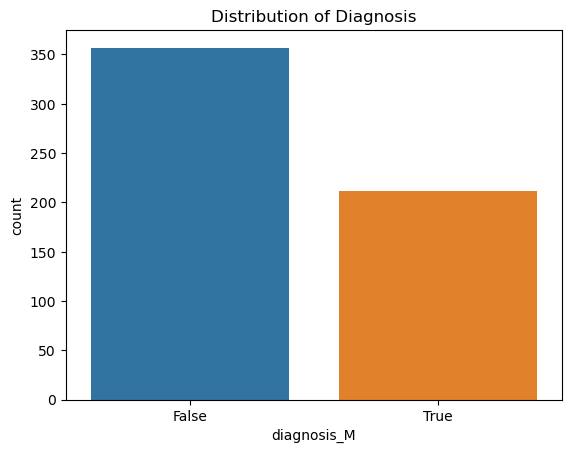

In [3]:
# Exploratory Data Visualization (EDV)
# Plot the distribution of the target variable
sns.countplot(x='diagnosis_M', data=df)
plt.title('Distribution of Diagnosis')
plt.show()
     


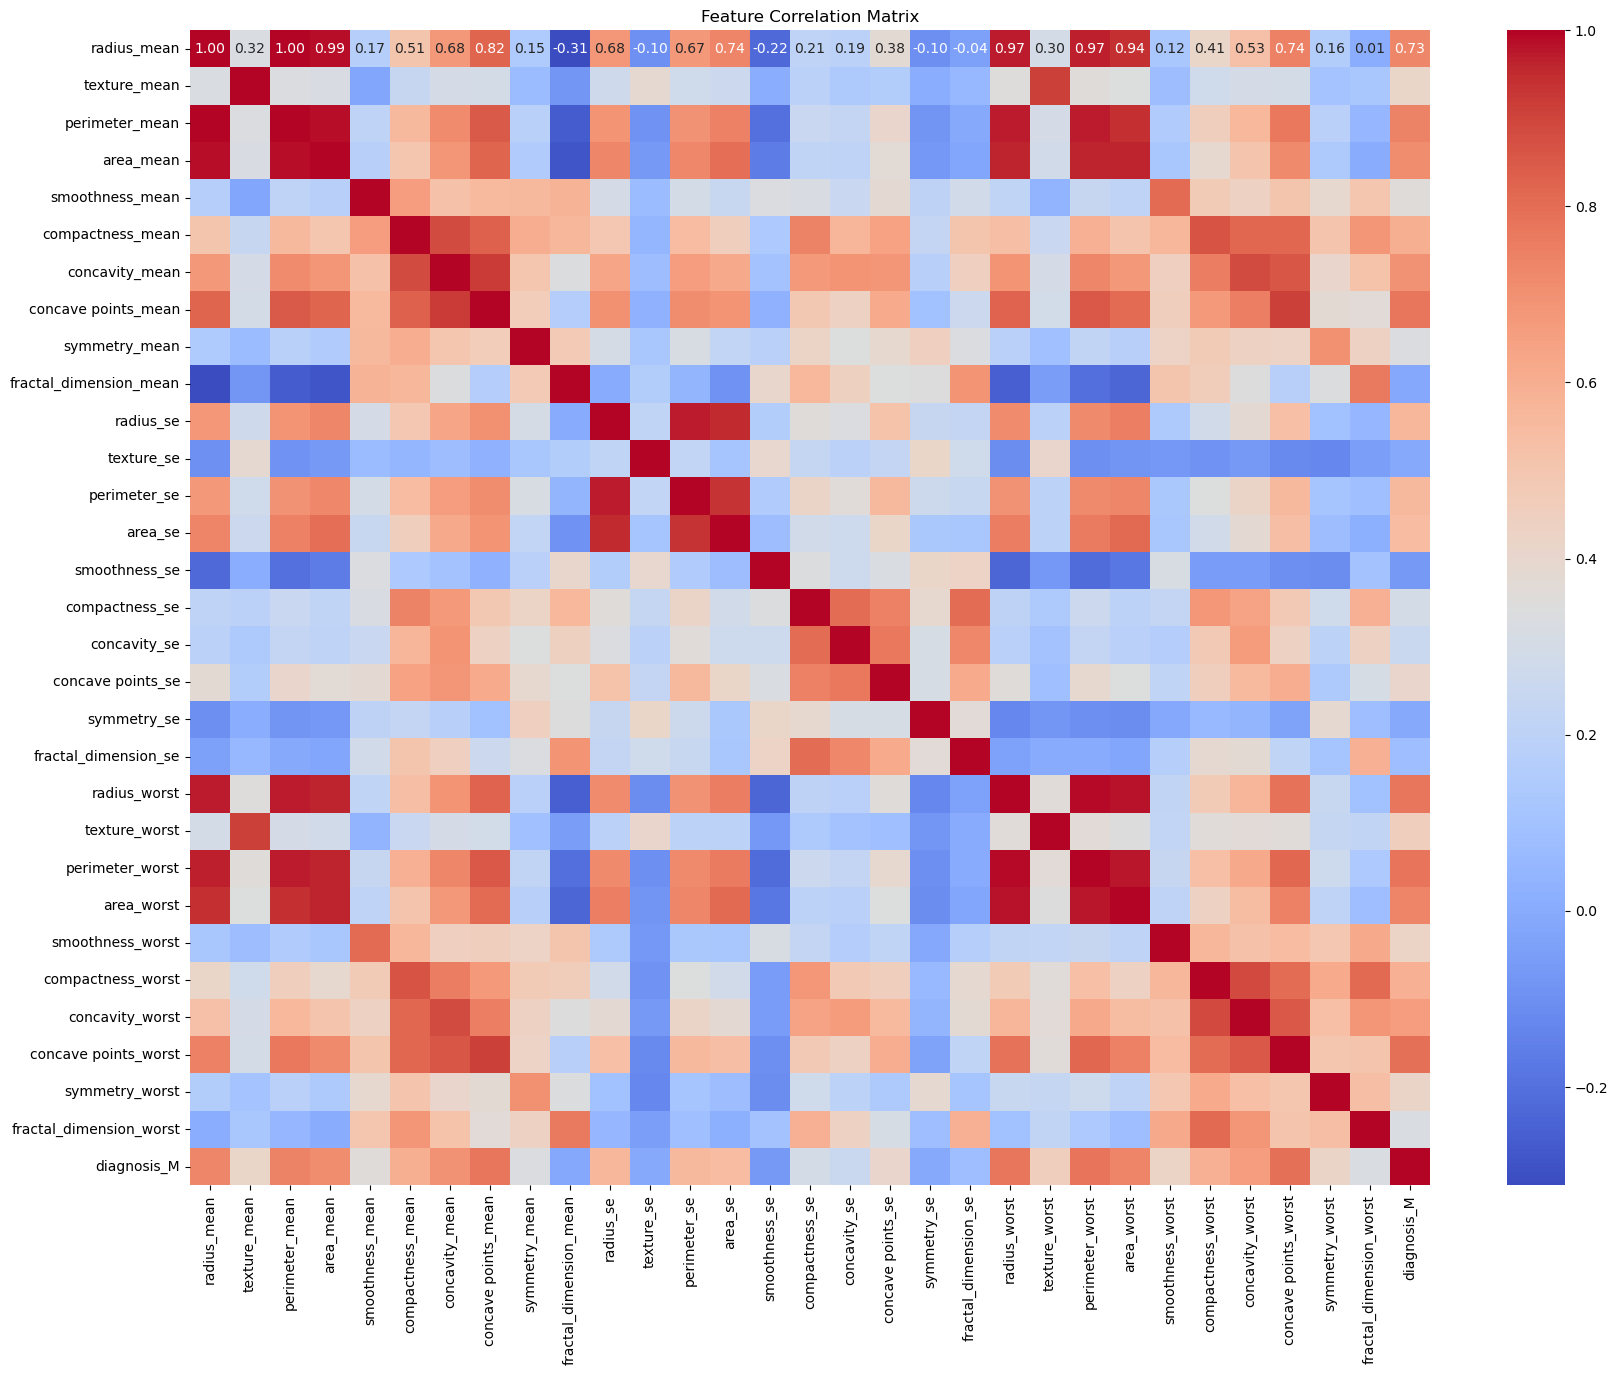

In [4]:
# Plot the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()



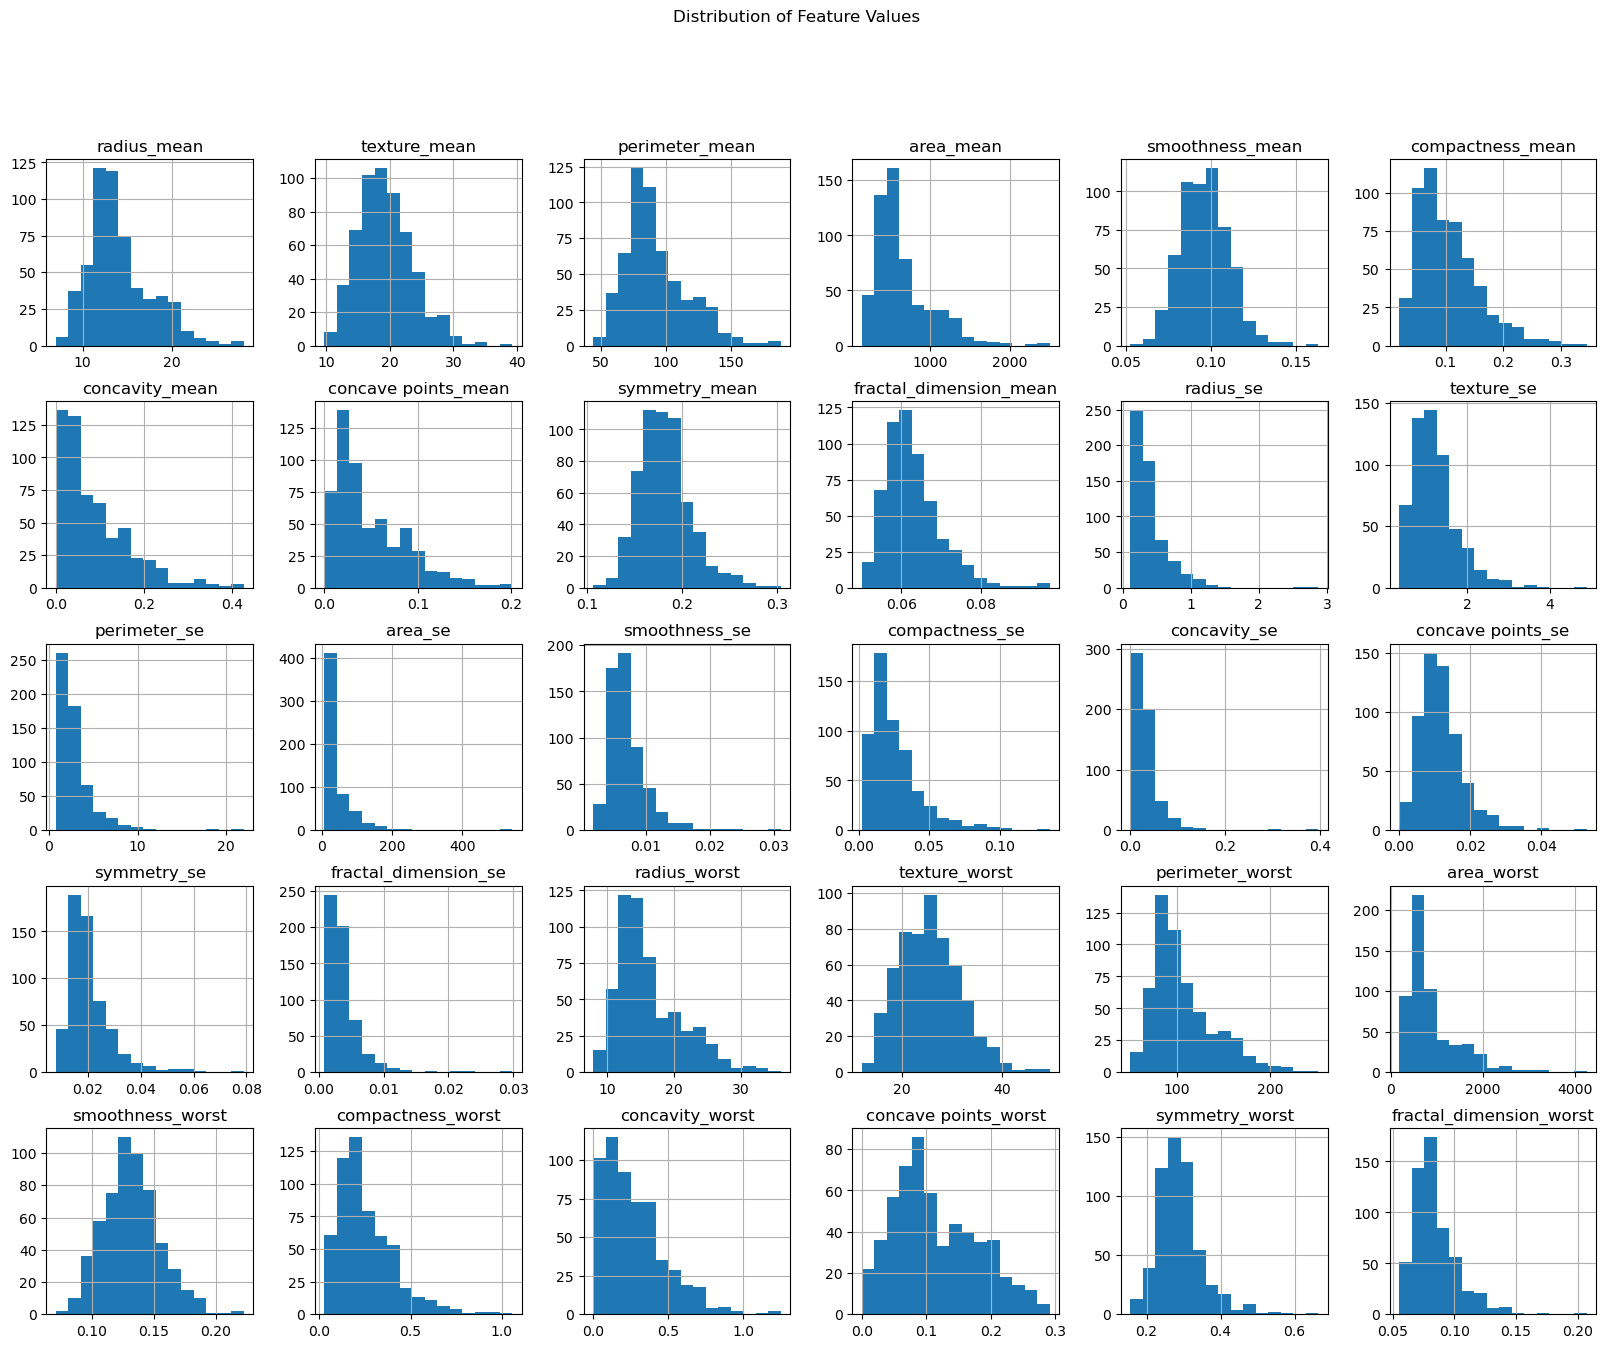

In [5]:
# Plot the distribution of feature values
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_columns].hist(bins=15, figsize=(20, 15), layout=(5, 6))
plt.suptitle('Distribution of Feature Values')
plt.show()



In [7]:
# Split the data
X = df.drop('diagnosis_M', axis=1)
y = df['diagnosis_M']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [5]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [15]:
# Initialize classifiers
log_reg = LogisticRegression()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
lin_reg = LinearRegression() 
gnb = GaussianNB()
sgd = SGDClassifier()

In [21]:
# Train classifiers
log_reg.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)


RandomForestClassifier()

In [24]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
gnb.fit(X_train_scaled, y_train)



GaussianNB()

In [22]:
knn.fit(X_train_scaled, y_train)
lin_reg.fit(X_train_scaled, y_train)


LinearRegression()

In [19]:
sgd.fit(X_train_scaled, y_train)

SGDClassifier()

In [20]:
# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_gnb = gnb.predict(X_test_scaled)
y_pred_sgd = sgd.predict(X_test_scaled)


acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_gnb = accuracy_score(y_test, y_pred_gnb)
acc_sgd = accuracy_score(y_test, y_pred_sgd)

y_pred_lin_reg = lin_reg.predict(X_test_scaled)
mse_lin_reg = np.mean((y_pred_lin_reg - y_test) ** 2)
r2_lin_reg = lin_reg.score(X_test_scaled, y_test)



print(f'Logistic Regression Accuracy: {acc_log_reg:.2f}')
print(f'Random Forest Accuracy: {acc_rf:.2f}')
print(f'K-Nearest Neighbors Accuracy: {acc_knn:.2f}')
print(f'Gaussian Naive Bayes Accuracy: {acc_gnb:.2f}')
print(f'SGD Classifier Accuracy: {acc_sgd:.2f}')
print(f'Linear Regression Mean Squared Error: {mse_lin_reg:.2f}')
print(f'Linear Regression R^2 Score: {r2_lin_reg:.2f}')

Logistic Regression Accuracy: 0.98
Random Forest Accuracy: 0.97
K-Nearest Neighbors Accuracy: 0.96
Gaussian Naive Bayes Accuracy: 0.91
SGD Classifier Accuracy: 0.95
Linear Regression Mean Squared Error: 0.06
Linear Regression R^2 Score: 0.73
